In [2]:
import kwant
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from scipy.constants import physical_constants
import tinyarray
import warnings
from scipy.sparse.linalg import eigs
import numpy as np
import scipy.sparse.linalg as sla

In [3]:
h_bar = physical_constants['Planck constant over 2 pi'][0]   
m_el = physical_constants['electron mass'][0]         
eV_unit = physical_constants['electron volt'][0]             
el_charge = physical_constants['elementary charge'][0]    
hh = physical_constants['Planck constant'][0]  
mu_B = physical_constants['Bohr magneton'][0]  
mu_B = mu_B/eV_unit
g = -50

In [4]:
m_ef = 0.014* m_el
dx = 20 * 10**(-9) 
alfa = 0.05*10**(-9)
delta = 0.2*10**(-3)
mu = 0.001
t_unit_J = h_bar**(2)/(2*m_ef*dx**2) 
t = t_unit_J/eV_unit 
L = 300*20
t_so = -1j*alfa/(2*dx)

In [5]:
sigma_x = np.array([[0,1],[1,0]])
sigma_y = np.array([[0,-1j],[1j,0]])
sigma_z = np.array([[1,0],[0,-1]])
sigma_0 = np.array([[1,0], [0,1]])
sigma_law = np.matrix([[1, 0], [0, 2]])

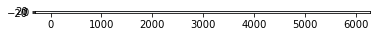

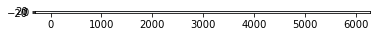

In [6]:
def make_system(Bx = 0, By = 0, Bz = 0): 
    
    def onsite(site):
        x,= site.pos
        return (2*t-mu)*np.kron(sigma_z, sigma_0) + 0.5*g*mu_B*(np.kron(sigma_z, Bx*sigma_x) + np.kron(sigma_z, By*sigma_y) + np.kron(sigma_z, Bz*sigma_z)) - delta * np.kron(sigma_y, sigma_y)
            

    def shape(pos):
        x,= pos
        return 0 <= x < L 

    
    def hopping(site1, site2):
        return -t*np.kron(sigma_z, sigma_0) - t_so * np.kron(sigma_z, sigma_y) 


    sys = kwant.Builder()  
    lat = kwant.lattice.chain(dx*10**(9), norbs=4)
    sys[lat.shape(shape,(0,))] = onsite
    sys[lat.neighbors()] = hopping
    

    sysf = sys.finalized()

    return sysf
sysf = make_system()
kwant.plot(sysf)

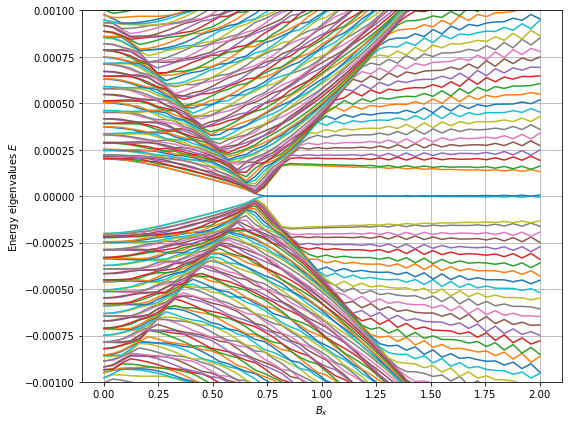

In [113]:
Bx_values = np.linspace(0, 2, 50)
n_values = 1200

eigvals_vs_Bx = []

for Bx in Bx_values:
    sys = make_system(Bx)
    ham_mat = sys.hamiltonian_submatrix(sparse=False)
    eigvals = np.linalg.eigh(ham_mat)[0]
    eigvals = np.sort(np.real(eigvals))  
    eigvals_vs_Bx.append(eigvals[:n_values]) 

eigvals_vs_Bx = np.array(eigvals_vs_Bx).T

plt.figure(figsize=(8, 6))
for i in range(n_values):
    plt.plot(Bx_values, eigvals_vs_Bx[i])
plt.xlabel(r'$B_x$')
plt.ylabel('Energy eigenvalues $E$')
plt.ylim(-0.001, 0.001)
plt.grid(True)
plt.tight_layout()
plt.savefig("Rys4.png")
plt.show()

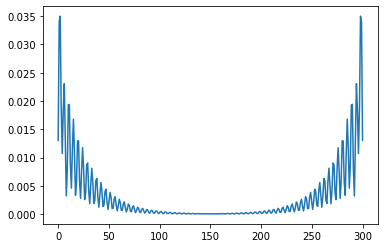

In [120]:
sysf = make_system(1)
ham_mat = sysf.hamiltonian_submatrix(sparse=False)
evals, evecs = np.linalg.eigh(ham_mat)
idx = np.argmin(np.abs(evals)) 
psi = evecs[:, idx]     
N = len(psi) // 4
prob_density = np.zeros(N)
x_table = np.linspace(0, 300, 300)
for i in range(N):
    prob_density[i] = np.abs(psi[4*i])**2 + np.abs(psi[4*i + 1])**2 + np.abs(psi[4*i + 2])**2 + np.abs(psi[4*i + 3])**2
plt.plot(x_table, prob_density)
plt.savefig("Rys5.png")

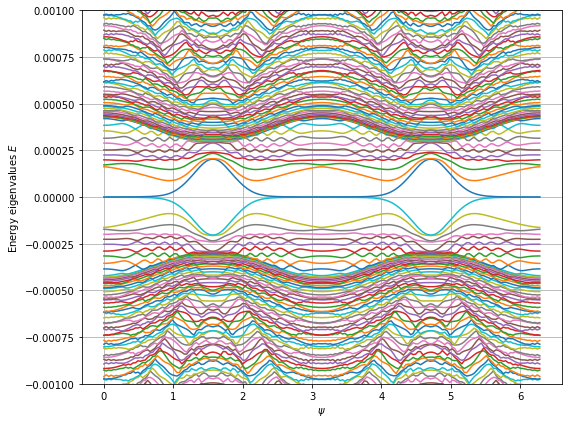

In [9]:
theta_table = np.linspace(0, 2*np.pi, 180)
n_values = 1200
eigvals_vs_theta = []

for theta in theta_table:
    sys = make_system(np.cos(theta), np.sin(theta))
    ham_mat = sys.hamiltonian_submatrix(sparse=False)
    eigvals = np.linalg.eigh(ham_mat)[0]
    eigvals = np.sort(np.real(eigvals)) 
    eigvals_vs_theta.append(eigvals[:n_values])
    
eigvals_vs_theta = np.array(eigvals_vs_theta).T   

plt.figure(figsize=(8, 6))
for i in range(n_values):
    plt.plot(theta_table, eigvals_vs_theta[i])
plt.xlabel(r'$\psi$')
plt.ylabel('Energy eigenvalues $E$')
plt.ylim(-0.001, 0.001)
plt.grid(True)
plt.tight_layout()
plt.savefig("Rys7.png")
plt.show()

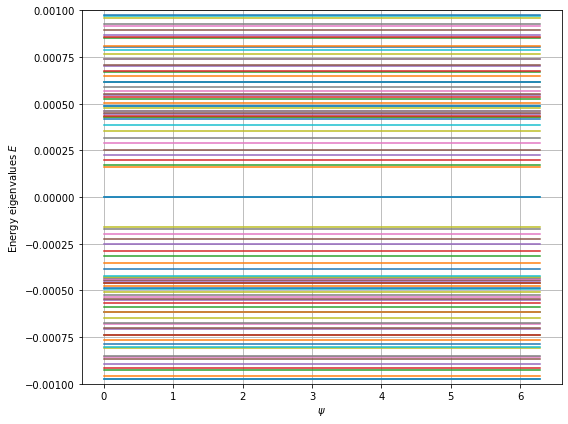

In [8]:
theta_table = np.linspace(0, 2*np.pi, 180)
n_values = 1200
eigvals_vs_theta = []

for theta in theta_table:
    sys = make_system(np.cos(theta), 0, np.sin(theta))
    ham_mat = sys.hamiltonian_submatrix(sparse=False)
    eigvals = np.linalg.eigh(ham_mat)[0]
    eigvals = np.sort(np.real(eigvals)) 
    eigvals_vs_theta.append(eigvals[:n_values])
    
eigvals_vs_theta = np.array(eigvals_vs_theta).T   

plt.figure(figsize=(8, 6))
for i in range(n_values):
    plt.plot(theta_table, eigvals_vs_theta[i])
plt.xlabel(r'$\psi$')
plt.ylabel('Energy eigenvalues $E$')
plt.ylim(-0.001, 0.001)
plt.grid(True)
plt.tight_layout()
plt.savefig("Rys6.png")
plt.show()